In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_sep_vmax import *

In [4]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [5]:
refdf = pd.read_csv('prelim_bottle.csv')


In [6]:
print_params()

Mh  = 1.16e-06, 1.00e-01
Mp  = 1.16e-06, 1.00e-01
gammaDp  = 6.00e-01, 5.18e+04
gammaDh  = 6.00e-01, 5.18e+04
Rp  = 7.00e+00, 6.05e+05
Rh  = 4.50e+00, 3.89e+05
EOp  = 1.16e-06, 1.00e-01
EIp  = 0.00e+00, 0.00e+00
EOh  = 1.16e-06, 1.00e-01
EIh  = 0.00e+00, 0.00e+00
KONp  = 1.43e-01, 1.23e+04
KINp  = 1.43e-01, 1.23e+04
KOCp  = 1.43e-01, 1.23e+04
KICp  = 1.43e-01, 1.23e+04
KONh  = 2.50e-01, 2.16e+04
KINh  = 2.50e-01, 2.16e+04
KOCh  = 2.50e-01, 2.16e+04
KICh  = 2.50e-01, 2.16e+04
VmaxONp  = 0.00e+00, 0.00e+00
VmaxINp  = 8.10e-06, 7.00e-01
VmaxOCp  = 0.00e+00, 0.00e+00
VmaxICp  = 5.67e-05, 4.90e+00
VmaxONh  = 1.50e-05, 1.30e+00
VmaxINh  = 1.50e-05, 1.30e+00
VmaxOCh  = 6.77e-05, 5.85e+00
VmaxICh  = 0.00e+00, 0.00e+00
Oh  = 1.00e+00, 8.64e+04
Op  = 1.00e+00, 8.64e+04
E_ROSp  = 6.48e-07, 5.60e-02
E_ROSh  = 4.05e-07, 3.50e-02
VROSmax  = 7.70e-06, 6.65e-01
K_ROSh  = 2.50e-01, 2.16e+04
omegaP  = 1.00e-02, 8.64e+02
omegaH  = 1.00e-05, 8.64e-01
ROS_decay  = 1.00e-02, 8.64e+02
KABp  = 1.43e+01, 1.23e

In [7]:
pro_vol, alt_vol, pro_vol**0.67, alt_vol**0.67, Qp, Qh

In [8]:
var_names, init_vars, calc_dydt, interm_names, intermediate_func = get_honly_data()

In [9]:
print_dydt0(calc_dydt, var_names, init_vars)


dBh/dt = 2.99e-04, init Bh = 2.86e+01, newval = 2.86e+01
dDON/dt = 5.26e-05, init DON = 2.00e+01, newval = 2.00e+01
dRDON/dt = 1.32e-05, init RDON = 0.00e+00, newval = 1.32e-05
dDIN/dt = -3.65e-04, init DIN = 1.00e+02, newval = 1.00e+02
dDOC/dt = -1.69e-03, init DOC = 1.32e+02, newval = 1.32e+02
dRDOC/dt = 5.95e-05, init RDOC = 0.00e+00, newval = 5.95e-05
dDIC/dt = 2.87e-04, init DIC = 3.00e+03, newval = 3.00e+03
dROS/dt = -2.09e-03, init ROS = 2.00e-01, newval = 1.98e-01
dABp/dt = 0.00e+00, init ABp = 0.00e+00, newval = 0.00e+00
dABh/dt = 1.16e-15, init ABh = 0.00e+00, newval = 1.16e-15


In [10]:
print_intermediate0(intermediate_func, interm_names, init_vars)


Xh   = 1.00e+10
limINh = 9.98e-01
limONh = 9.88e-01
limICh = 1.00e+00
limOCh = 9.98e-01
gross_uptakeINh = 4.29e-04
gross_uptakeONh = 4.25e-04
gross_uptakeICh = 0.00e+00
gross_uptakeOCh = 1.93e-03
net_uptakeNh = 4.29e-04
overflowNh = 4.24e-04
overflowCh = -1.30e-18
deathh = 3.31e-05
leakinessOh = 3.31e-05
leakinessIh = 0.00e+00
ROSbreakdownh = 9.77e-05
respirationh = 6.38e-05
dic_air_water_exchange = -1.04e-16


In [11]:
biomass_diff0_honly(calc_dydt, var_names,init_vars)


dBh/dt + dDON/dt + dRDON/dt + dDIN/dt = -1.1574400292369003e-15


In [12]:
init_vars

In [13]:
var_names

['Bh', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS', 'ABp', 'ABh']

In [14]:
sol = run_solver(calc_dydt, init_vars, days=140, t_eval=get_t_eval(maxday=140, step = 3600*4, ref_times = refdf['t']))
#sol = run_solver(calc_dydt, init_vars)

simulation time 11.390625


In [15]:
df, mdf = solver2df(sol, var_names, interm_names, intermediate_func)

In [16]:
df.head()

,Bh,DON,RDON,DIN,DOC,RDOC,DIC,ROS,ABp,ABh,...,overflowCh,deathh,leakinessOh,leakinessIh,ROSbreakdownh,respirationh,dic_air_water_exchange,Bh[C],ABp[C],ABh[C]
0,28.571429,20.000000,0.000000,100.000000,132.500000,0.000000,3000.000000,0.200000,0.0,0.000000e+00,...,-1.301043e-18,0.000033,0.000033,0.0,0.000098,0.000064,-1.040834e-16,128.571429,0.0,0.000000e+00
1,33.219081,20.819192,0.205581,94.327574,106.197403,0.925115,3003.913610,0.001220,0.0,1.344274e-13,...,-1.734723e-18,0.000038,0.000038,0.0,0.000001,0.000074,-7.501086e-05,149.485864,0.0,6.049232e-13
2,38.617253,21.775441,0.444588,87.734146,75.641623,2.000646,3007.519408,0.001398,0.0,1.562723e-13,...,-1.301043e-18,0.000045,0.000045,0.0,0.000002,0.000086,-1.441220e-04,173.777640,0.0,7.032256e-13
3,44.876753,22.899918,0.722393,80.072365,40.193723,3.250768,3010.993433,0.001597,0.0,1.816034e-13,...,-2.168404e-18,0.000052,0.000052,0.0,0.000002,0.000100,-2.107075e-04,201.945387,0.0,8.172154e-13
4,51.870591,24.478600,1.044939,71.177299,0.281262,4.702224,3014.468780,0.001813,0.0,2.100204e-13,...,-1.084202e-18,0.000060,0.000060,0.0,0.000003,0.000112,-2.773183e-04,233.417659,0.0,9.450917e-13


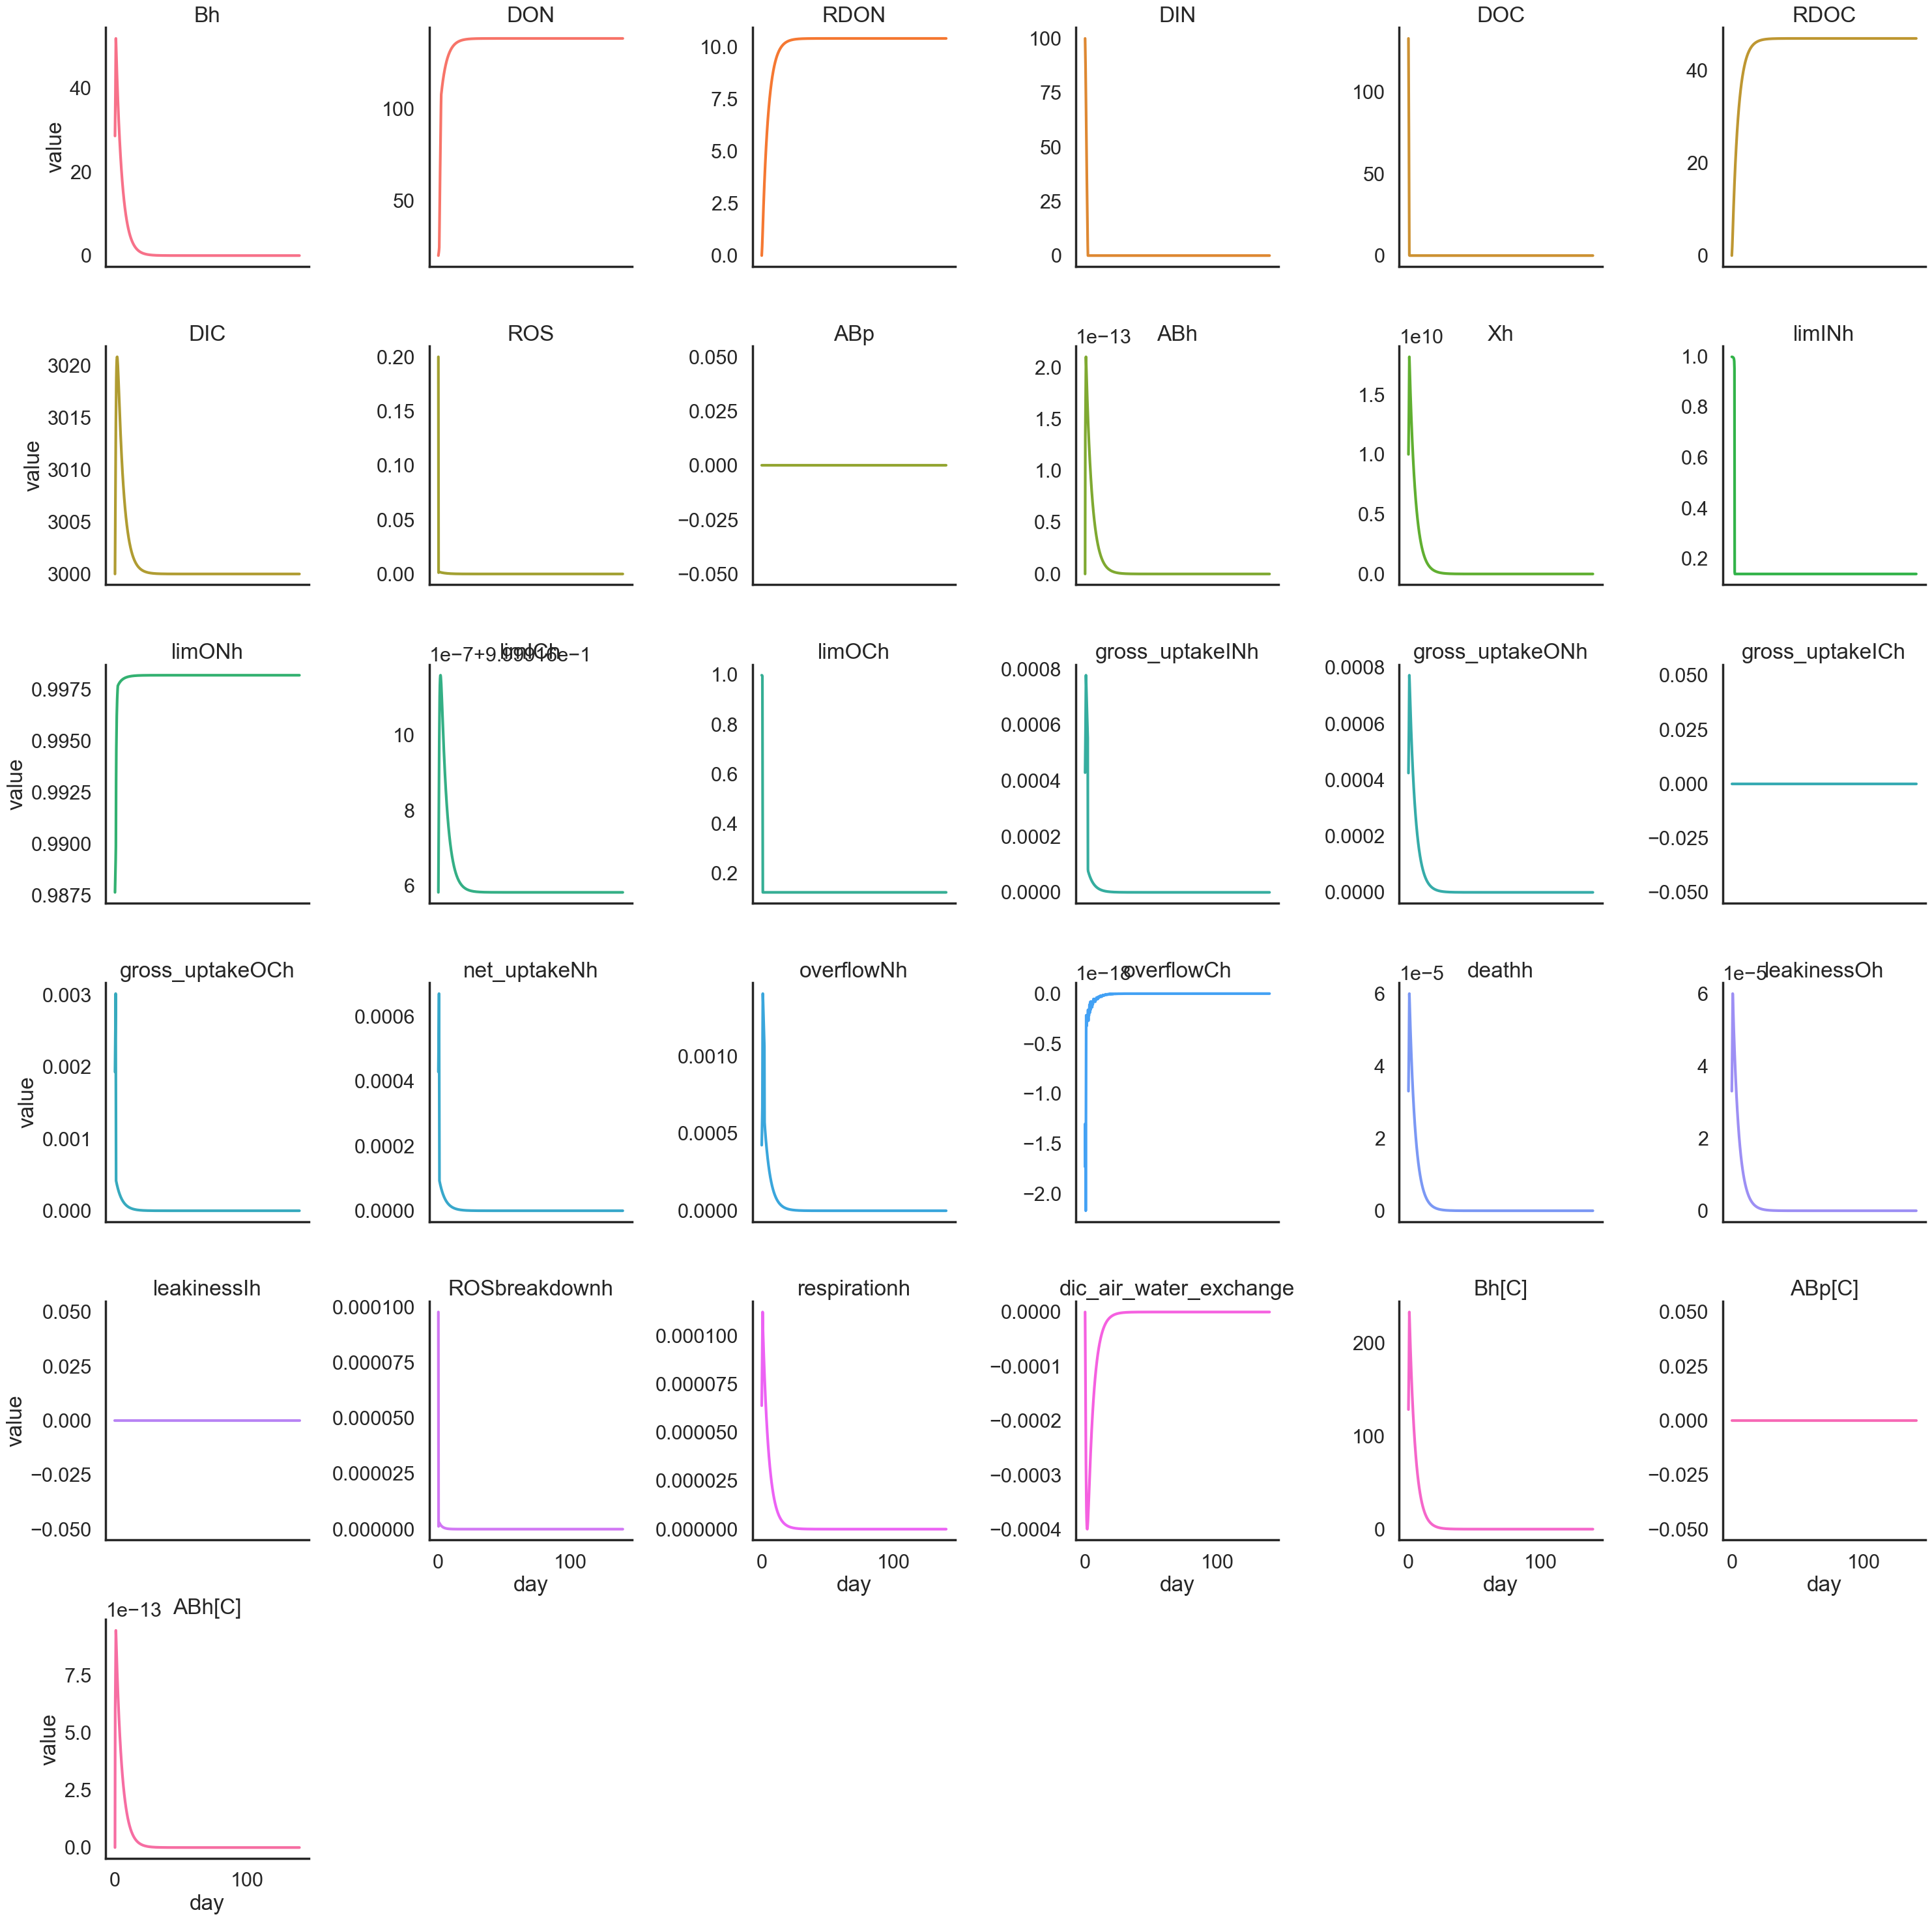

In [17]:
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')

In [18]:
refdf.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'day', '1A3', 'cc 1A3', 'cc mit9312',
       'mit9312', 'cc Bh[N]', 'Bh[N]', 'cc Bp[N]', 'Bp[N]', 'cc Bh[C]',
       'Bh[C]', 'cc Bp[C]', 'Bp[C]', 't'],
      dtype='object')

In [19]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(hnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5 , legend=False,
            palette=hnpalette, hue_order=hnorder,
           ).set(ylabel='umol/l')
sns.scatterplot(data=refdf, x='day', y='Bh[N]', ax=g.ax, s=100, legend=False, color=HCOLOR_light, marker='P')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(hcorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=hcpalette, hue_order=hcorder,
           ).set(ylabel='umol/l')
sns.scatterplot(data=refdf, x='day', y='Bh[C]', ax=g.ax, s=100, legend=False, color=HCOLOR_light, marker='P')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xh'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=[HCOLOR_light], 
           ).set(ylabel='cells/l')
#sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='1A3', ax=g.ax, s=100, legend=False, color=HCOLOR_light, marker='P')


<AxesSubplot:xlabel='day', ylabel='cells/l'>

In [20]:
sns.relplot(data=mdf.loc[mdf.variable.isin(hnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5,
            palette=hnpalette, hue_order=hnorder, legend=False,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,4e2))

sns.relplot(data=mdf.loc[mdf.variable.isin(hcorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5,
            palette=hcpalette, hue_order=hcorder, legend=False,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,1e4))

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xh'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=[HCOLOR_light], 
           ).set(ylabel='cells/l', yscale='log')
#sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='1A3', ax=g.ax, s=100, legend=False,color=HCOLOR_light, marker='P')


<AxesSubplot:xlabel='day', ylabel='cells/l'>

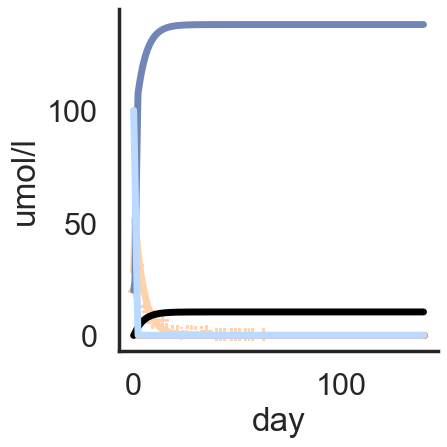

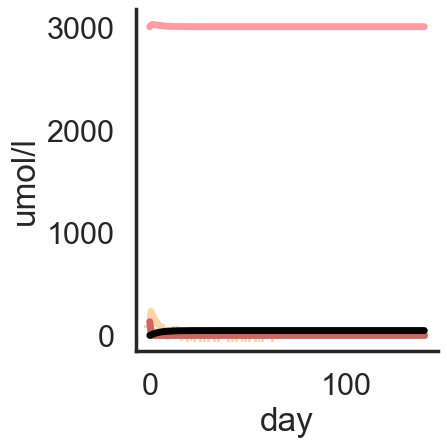

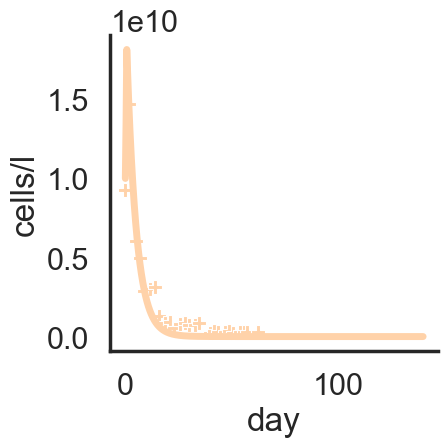

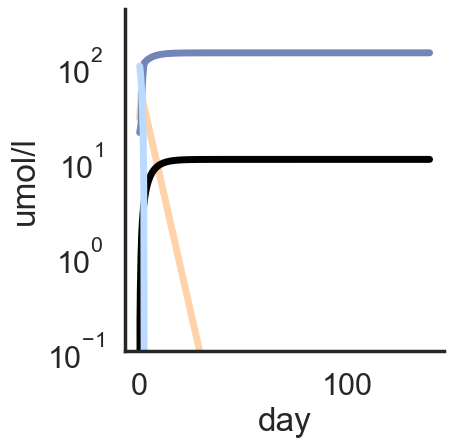

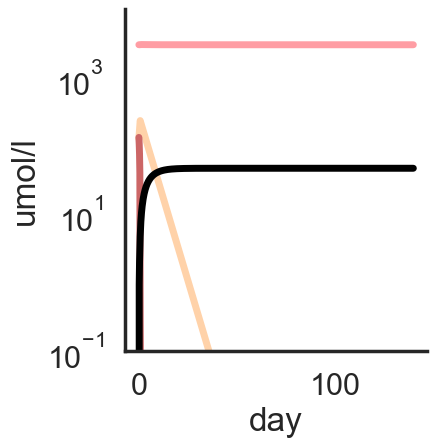

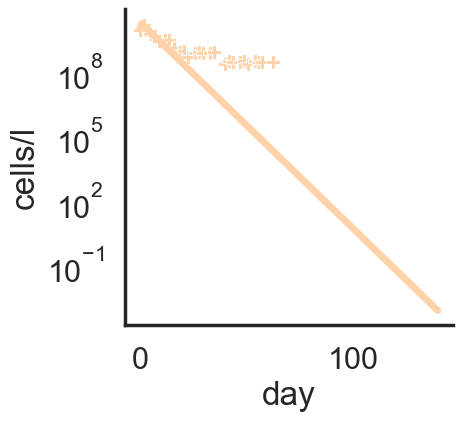

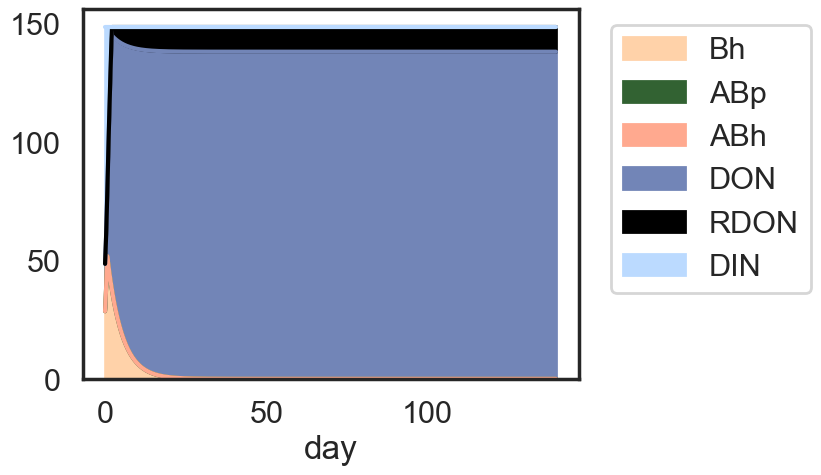

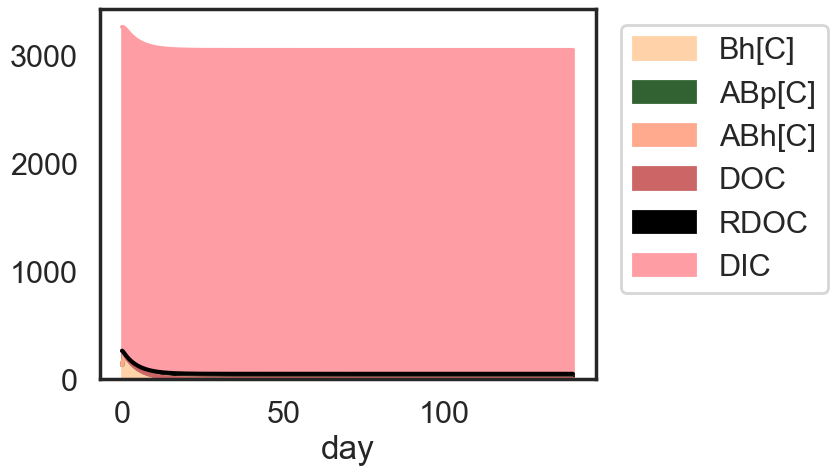

In [21]:
from matplotlib.colors import LinearSegmentedColormap
df[hnorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", hnpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()
df[hcorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", hcpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()

In [22]:
len(param_vals)

In [23]:
df.min()

Bh                        2.101411e-12
DON                       2.000000e+01
RDON                      0.000000e+00
DIN                       4.063793e-02
DOC                       3.512594e-02
RDOC                      0.000000e+00
DIC                       3.000000e+03
ROS                       8.514843e-17
ABp                       0.000000e+00
ABh                       0.000000e+00
t                         0.000000e+00
day                       0.000000e+00
Xh                        7.354938e-04
limINh                    1.396923e-01
limONh                    9.876410e-01
limICh                    9.999166e-01
limOCh                    1.230769e-01
gross_uptakeINh           4.416854e-18
gross_uptakeONh           3.156126e-17
gross_uptakeICh           0.000000e+00
gross_uptakeOCh           1.751176e-17
net_uptakeNh              3.891501e-18
overflowNh                3.208661e-17
overflowCh               -2.168404e-18
deathh                    2.432188e-18
leakinessOh              

In [24]:
dir(sol)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [25]:
pd.DataFrame([param_vals], index = ['value']).T.to_excel('Model_Parameters.xlsx')